<a href="https://colab.research.google.com/github/Cecilia148/Red-Light-Violation-Detection-System/blob/main/traffic_light_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing ultralytics using pip install

In [1]:
#Creating a helper variable to manage different paths
import os

In [2]:
#Returning path files that match a specific pattern
import glob

In [3]:
#Get the current working directory
HOME = os.getcwd()

In [4]:
print (HOME)

/content


In [2]:
! git clone https://github.com/MuhammadMoin97/ultralytics.git ultralytics1

Cloning into 'ultralytics1'...
remote: Enumerating objects: 3878, done.
remote: Total 3878 (delta 0), reused 0 (delta 0), pack-reused 3878
Receiving objects: 100% (3878/3878), 1.82 MiB | 9.66 MiB/s, done.
Resolving deltas: 100% (2691/2691), done.


#setting current directory

#Installing all the dependencies

In [1]:
!pip install -r /content/ultralytics1/requirements.txt
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusol

^C


#Importing the traffic lights dataset from roboflow

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="YrXANJjOu5PKjjATmeu4")
project = rf.workspace("wawan-pradana").project("cinta_v2")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to cinTA_v2-1 in yolov8:: 100%|██████████| 4806/4806 [00:00<00:00, 7905.61it/s]


In [6]:
!cp  /content/ultralytics1/ultralytics/yolo/v8/detect/train.py /content/train.py
!cp /content/ultralytics1/ultralytics/yolo/v8/detect/predict.py /content/predict.py
!cp /content/ultralytics1/ultralytics/yolo/v8/detect/val.py /content/val.py
!cp -r /content/ultralytics1/ultralytics /content/ultralytics

In [7]:
import yaml

# Define the path to the YAML file
yaml_file_path = "/content/cinTA_v2-1/data.yaml"


# Read the YAML file
with open(yaml_file_path, "r") as file:
    data = yaml.safe_load(file)

# Add the new path
data['path'] = "/content/"

# Write the updated data back to the YAML file
with open(yaml_file_path, "w") as file:
    yaml.dump(data, file)

#Train the YOLOV8 model on the custom dataset

In [8]:

!python /content/train.py model=yolov8n.pt data="/content/cinTA_v2-1/data.yaml" epochs=80 imgsz=640

100% 6.23M/6.23M [00:00<00:00, 83.4MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/cinTA_v2-1/data.yaml, epochs=80, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.

In [9]:
from google.colab import files

files.download('runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
!python /content/predict.py model=runs/detect/train/weights/best.pt source='/content/cinTA_v2-1/test/images/traffic-light--119-_jpg.rf.65198e341a15fa6a0ba8be43a289c5f2.jpg'

2024-05-03 10:45:59.373200: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 10:45:59.373291: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 10:45:59.375171: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-03 10:46:01.067171: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
image 1/1 /content/cinTA_v2-1/test/images/traffic-light--119-_jpg.

In [11]:
from google.colab import files
files.download('/content/runs/detect/train2/traffic-light--119-_jpg.rf.65198e341a15fa6a0ba8be43a289c5f2.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Displaying confusion matrix

In [12]:
#import image to display a single image
#import display to display multiple images

from IPython.display import Image, display

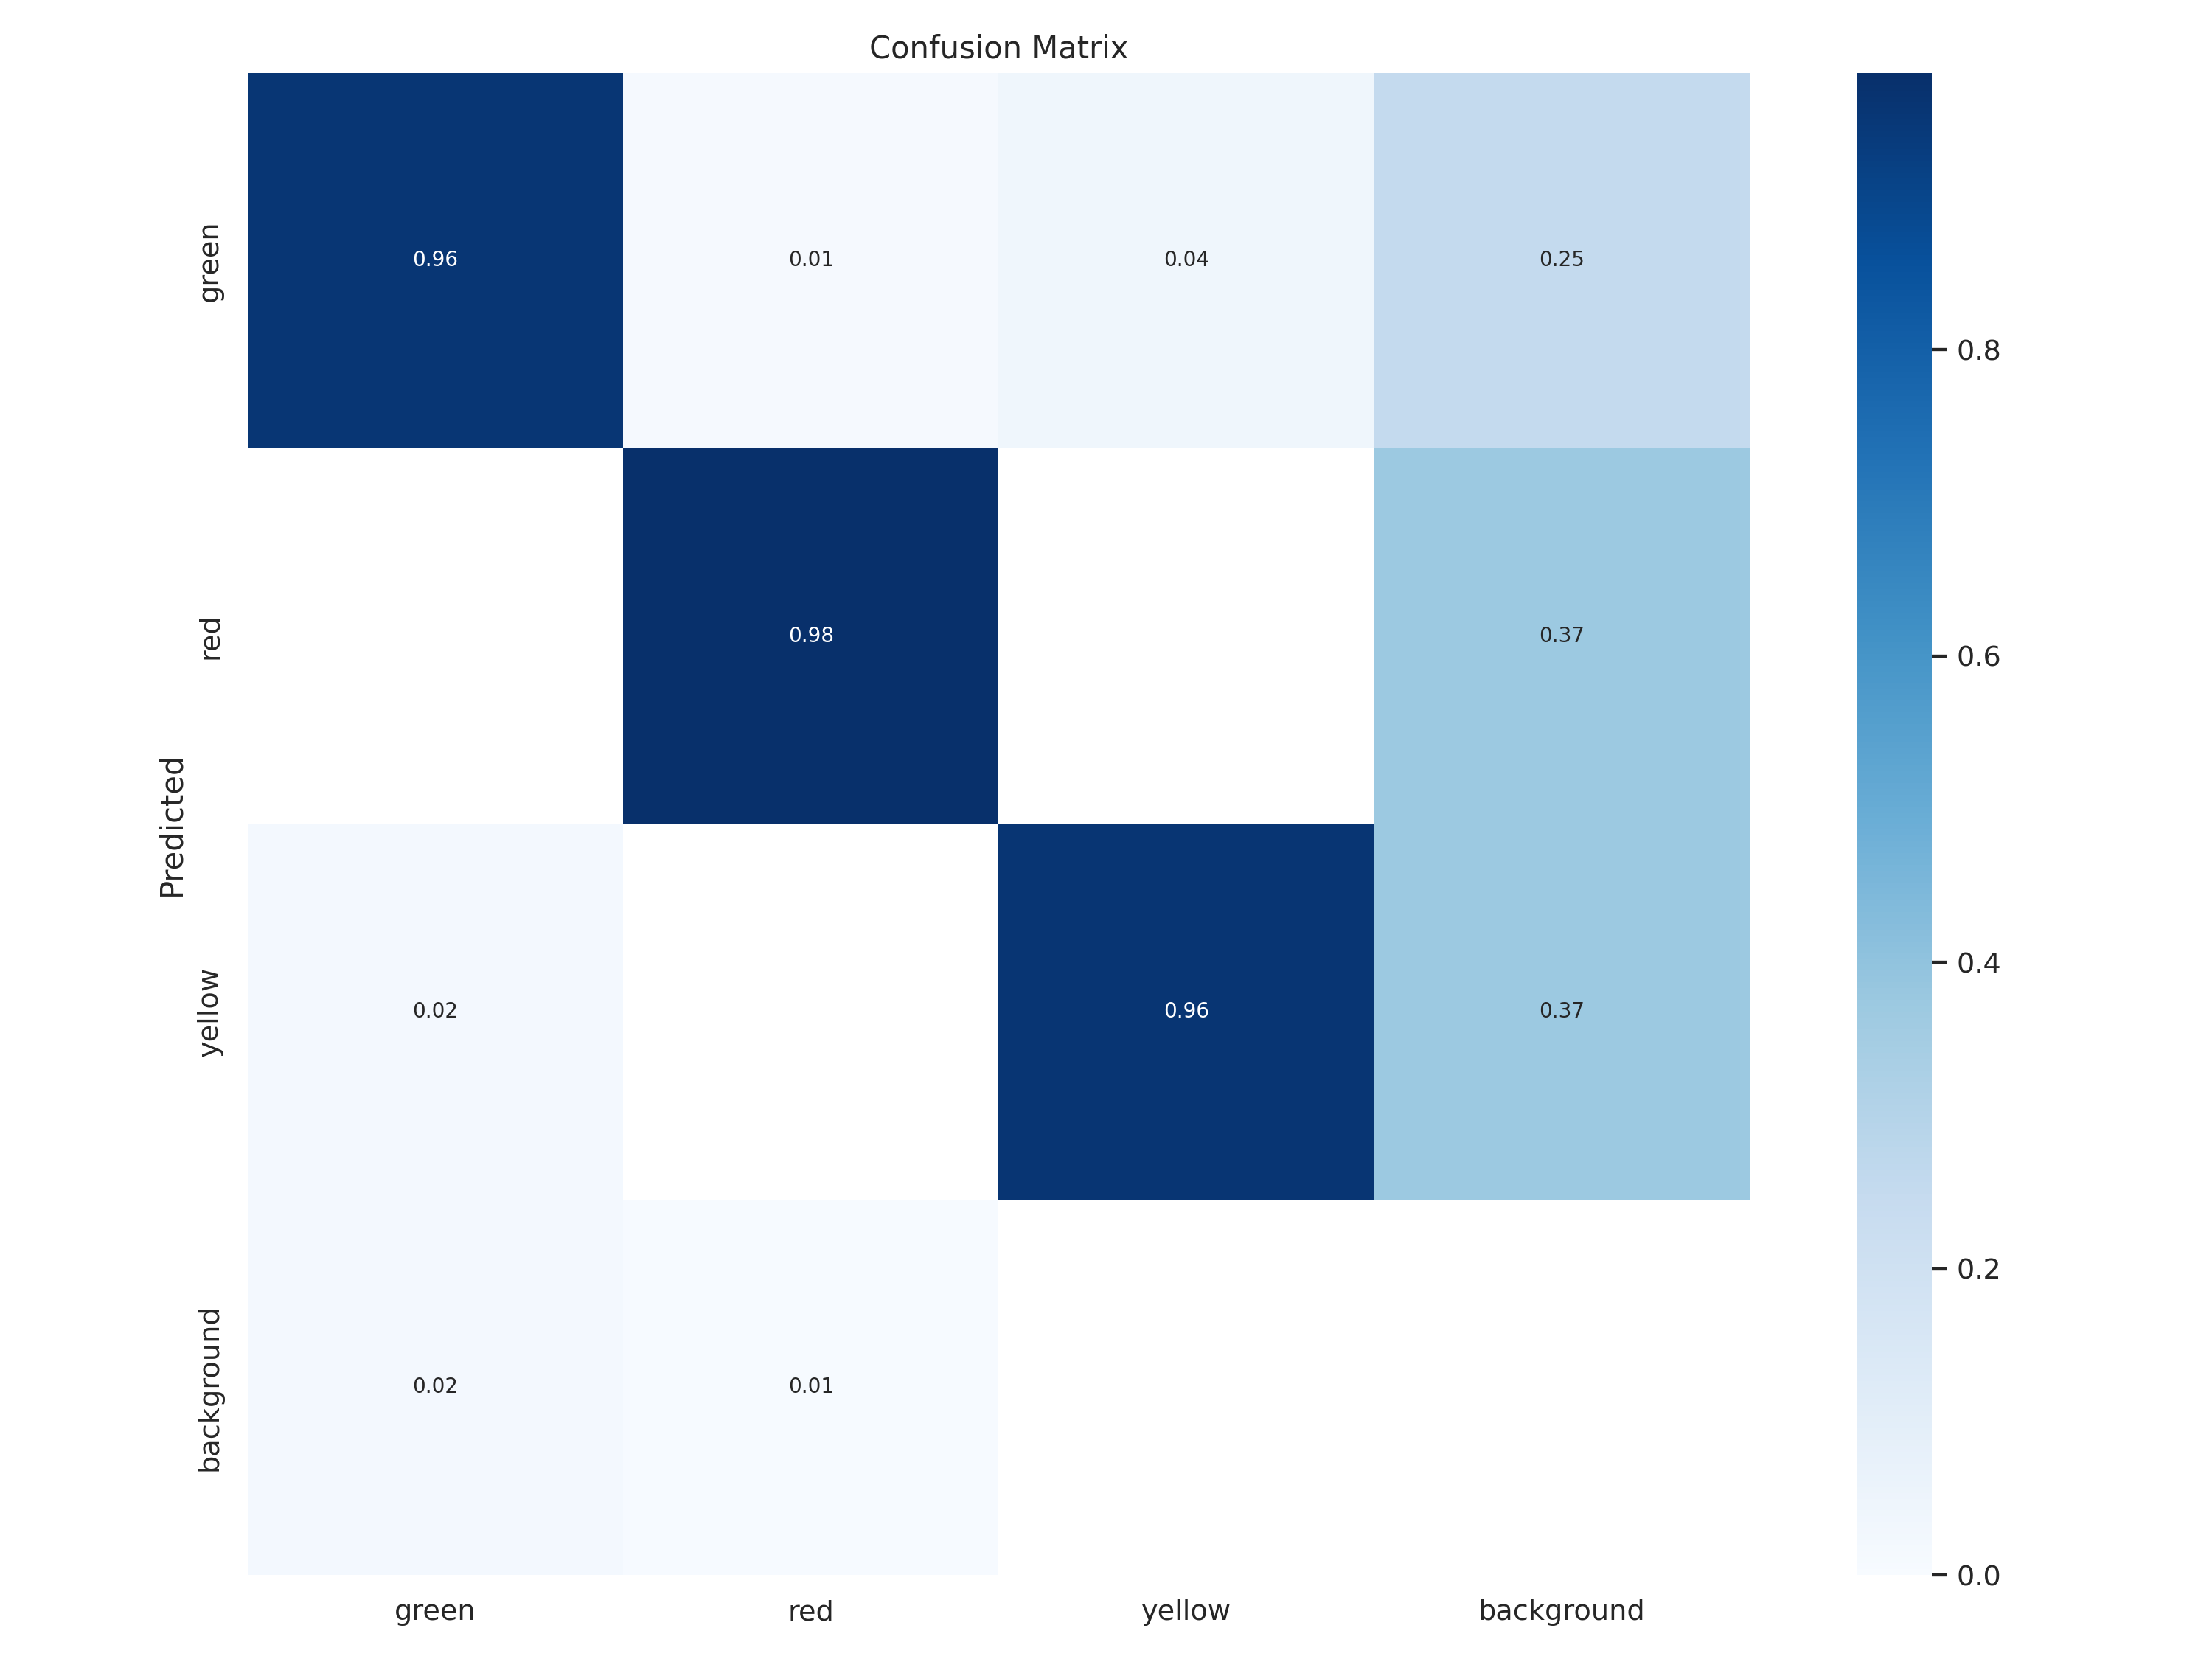

In [13]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

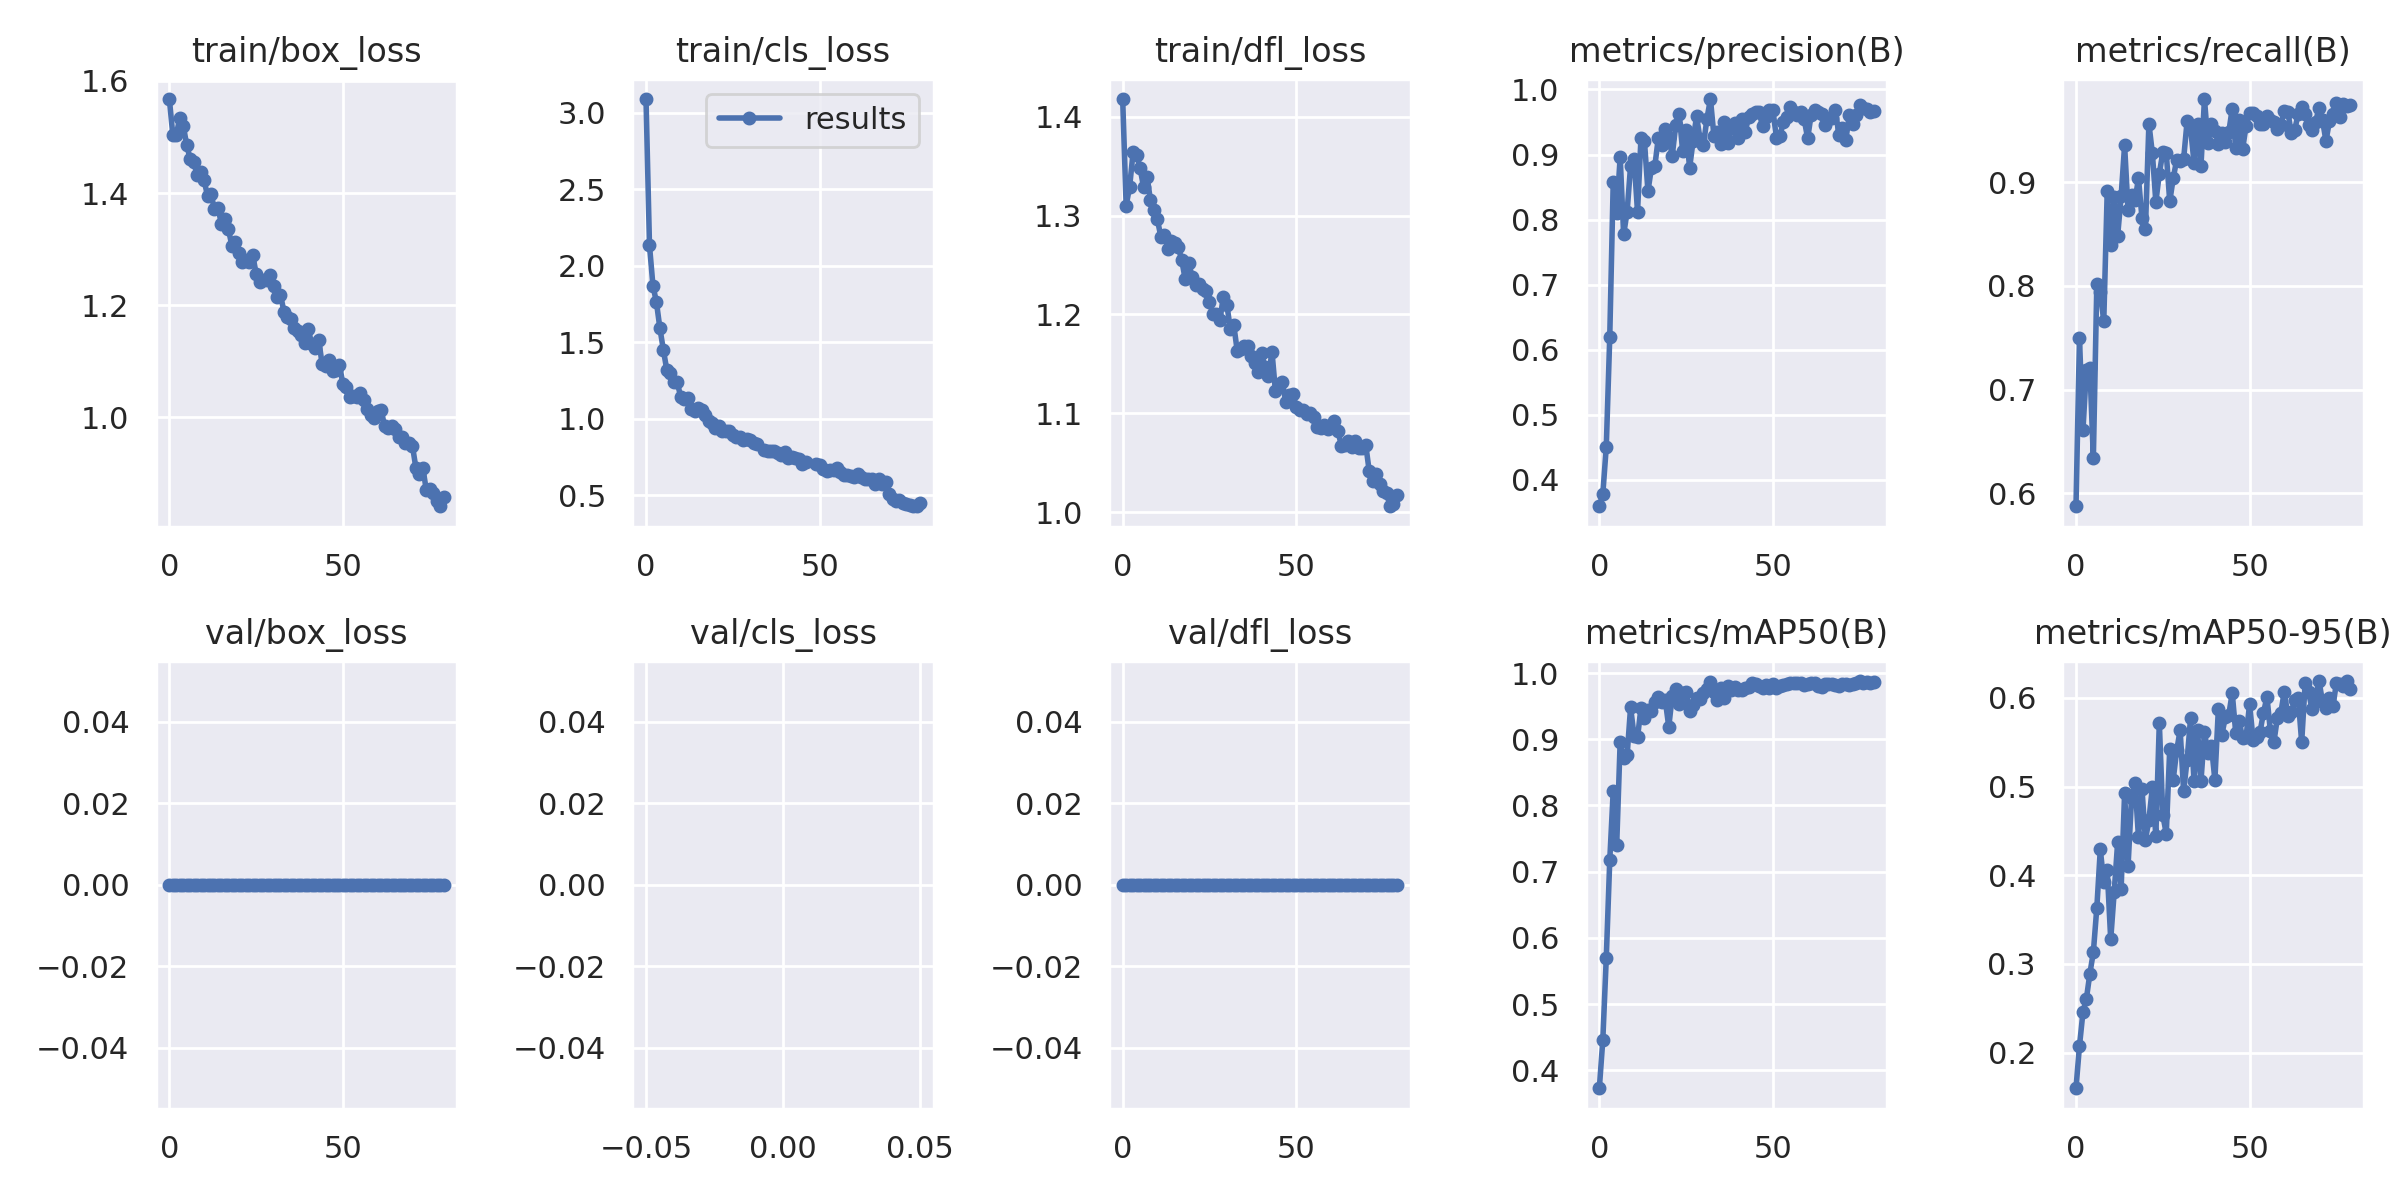

In [16]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

#Validating custom model

In [14]:
!python /content/val.py model='{HOME}/runs/detect/train/weights/best.pt' data="/content/cinTA_v2-1/data.yaml"

2024-05-03 10:48:37.431962: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 10:48:37.432027: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 10:48:37.433521: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-03 10:48:39.116874: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/cinTA_v2-1/valid/labels.cache... 200 images

#Inference with custom model

In [15]:
!python predict.py model='{HOME}/runs/detect/train/weights/best.pt' source='/content/cinTA_v2-1/test/images'

2024-05-03 10:49:32.085881: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 10:49:32.085946: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 10:49:32.087174: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-03 10:49:33.329736: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/100 /content/cin

In [17]:
files.download('/content/runs/detect/train4/traffic-light--581-_jpg.rf.abfca644d1d7ab69f332efaa45d60c8b.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('/content/runs/detect/train5/traffic-light--997-_jpg.rf.e871b665c17c6fc6d63df761add1acf5.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Testing on a demo video

In [29]:
!python predict.py model='/content/runs/detect/train/weights/best.pt' source='/content/drive/MyDrive/trafficvideo demo3.mp4'

2024-05-03 11:18:59.483293: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 11:18:59.483343: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 11:18:59.484612: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-03 11:19:00.707312: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/138) /conte

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
from google.colab import files
files.download('/content/runs/detect/train9/trafficvideo demo3.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>